# Sommaire

* [Import des Librairies](#Import-des-Librairies)
* [Load du Dataset](#Load-du-Dataset)
* [Exploratory Data Analysis](#1.-Exploratory-Data-Analysis)
    * [Analyse de la forme](#Analyse-de-la-forme-des-données)
    * [Analyse du Fond](#Analyse-du-Fond)
* [DataCleaning pour le Model](#Datacleaning-pour-le-model)
    * [Suppression des Doublons](#Suppression-des-doublons)
    * [Suppression des Outliers](#Remove-Outliers)
* [Visualisations de la targer et des features](#Visualisation-de-la-target-et-des-features)

# Import des Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.impute import MissingIndicator 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load du Dataset

In [3]:
data = pd.read_csv("en.openfoodfacts.org.products.csv", delimiter="\t", chunksize=1000000)
df = pd.concat(data)
pd.options.display.max_columns = None
display(df)

C:\Users\Utilisateur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: DtypeWarning: Columns (0,8,13,27,28,29,31,52,64,75,77) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*args, **kwargs)
C:\Users\Utilisateur\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: DtypeWarning: Columns (0,8,13,29,31,47,52,64) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*args, **kwargs)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:origins-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-to-be-c

#  Exploratory Data Analysis

## Objectif :

.  Créer une application en utilisant la base de donnée opensource  
.  Notre but sera de confectionner un model de prediction capable de predire les nutriscore des produits qui ne le possède pas 

## Analyse de la forme des données

In [4]:
df.shape

(1969352, 186)

<AxesSubplot:ylabel='None'>

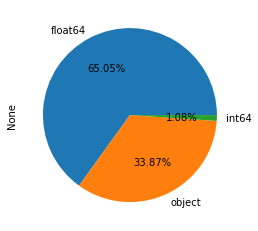

In [5]:
df.dtypes.value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

In [6]:
df.isnull().sum()

code                        0
url                         0
creator                     4
created_t                   0
created_datetime            0
                       ...   
choline_100g          1969289
phylloquinone_100g    1967640
beta-glucan_100g      1969314
inositol_100g         1969283
carnitine_100g        1969313
Length: 186, dtype: int64

KeyboardInterrupt: 

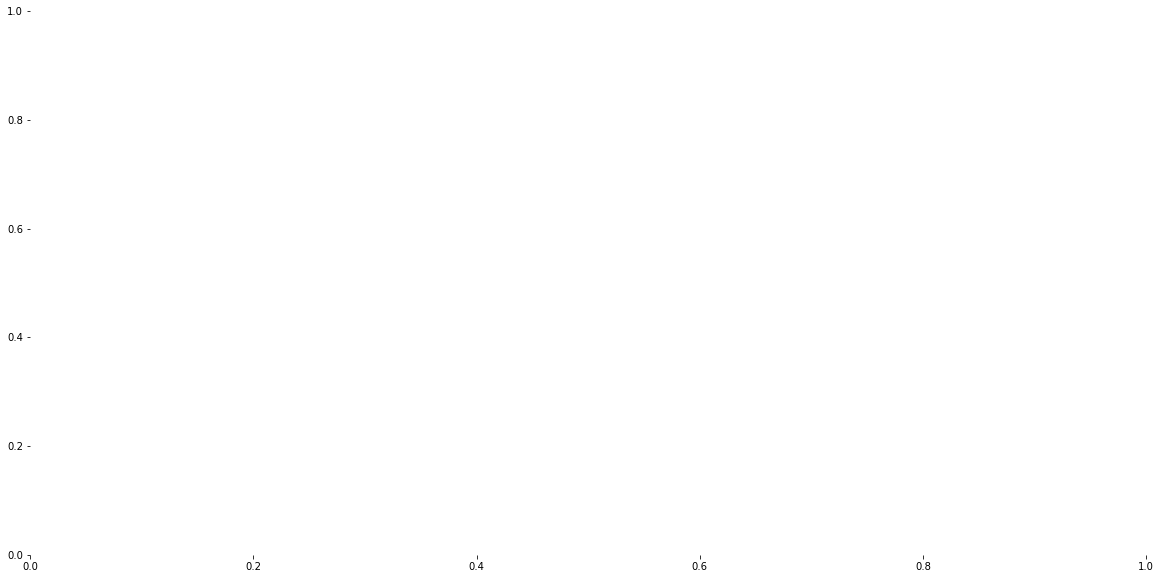

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

## Analyse du Fond

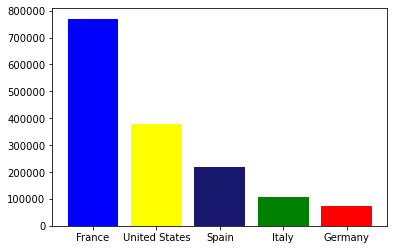

In [15]:
df["countries_en"].value_counts().head()
col=['blue','yellow','midnightblue','green','red']
# Categorical data: Country names
countries = ['France', 'United States', 'Spain', 'Italy', 'Germany']
# Integer value interms of death counts
totalproduits = [770273,378870, 218513,107694,74417]
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(countries, totalproduits,color=col)
# Displaying the bar plot
plt.show()

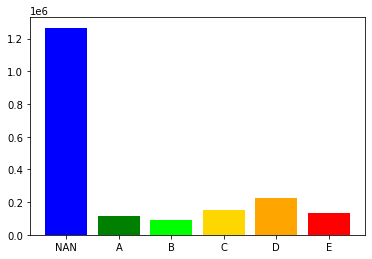

In [14]:
df['nutriscore_grade'].value_counts()
df['nutriscore_grade'].isna().sum()
col=['blue','green','lime','gold','orange','red']
# Categorical data: Country names
score = ['NAN','A', 'B', 'C', 'D', 'E']
# Integer value interms of death counts
totalscore = [1266074,114653,93524, 154445,223346,131962]
# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(score, totalscore,color=col)
# Displaying the bar plot
plt.show()

In [18]:
g100 = [_ for _ in df.columns if '100g' in _]


df_100g=df[['energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g']]
df_100g.head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.4,0.90,NaN,NaN,9.8,9.8,NaN,2.7,0.1,0.04,NaN,NaN,NaN,NaN,NaN
2,375.0,1569.0,7.0,3.08,NaN,NaN,70.1,15.0,NaN,7.8,1.4,0.56,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,163.9,685.8,1.9,1.00,NaN,NaN,NaN,NaN,NaN,15.3,1.1,0.44,NaN,NaN,NaN,NaN,NaN


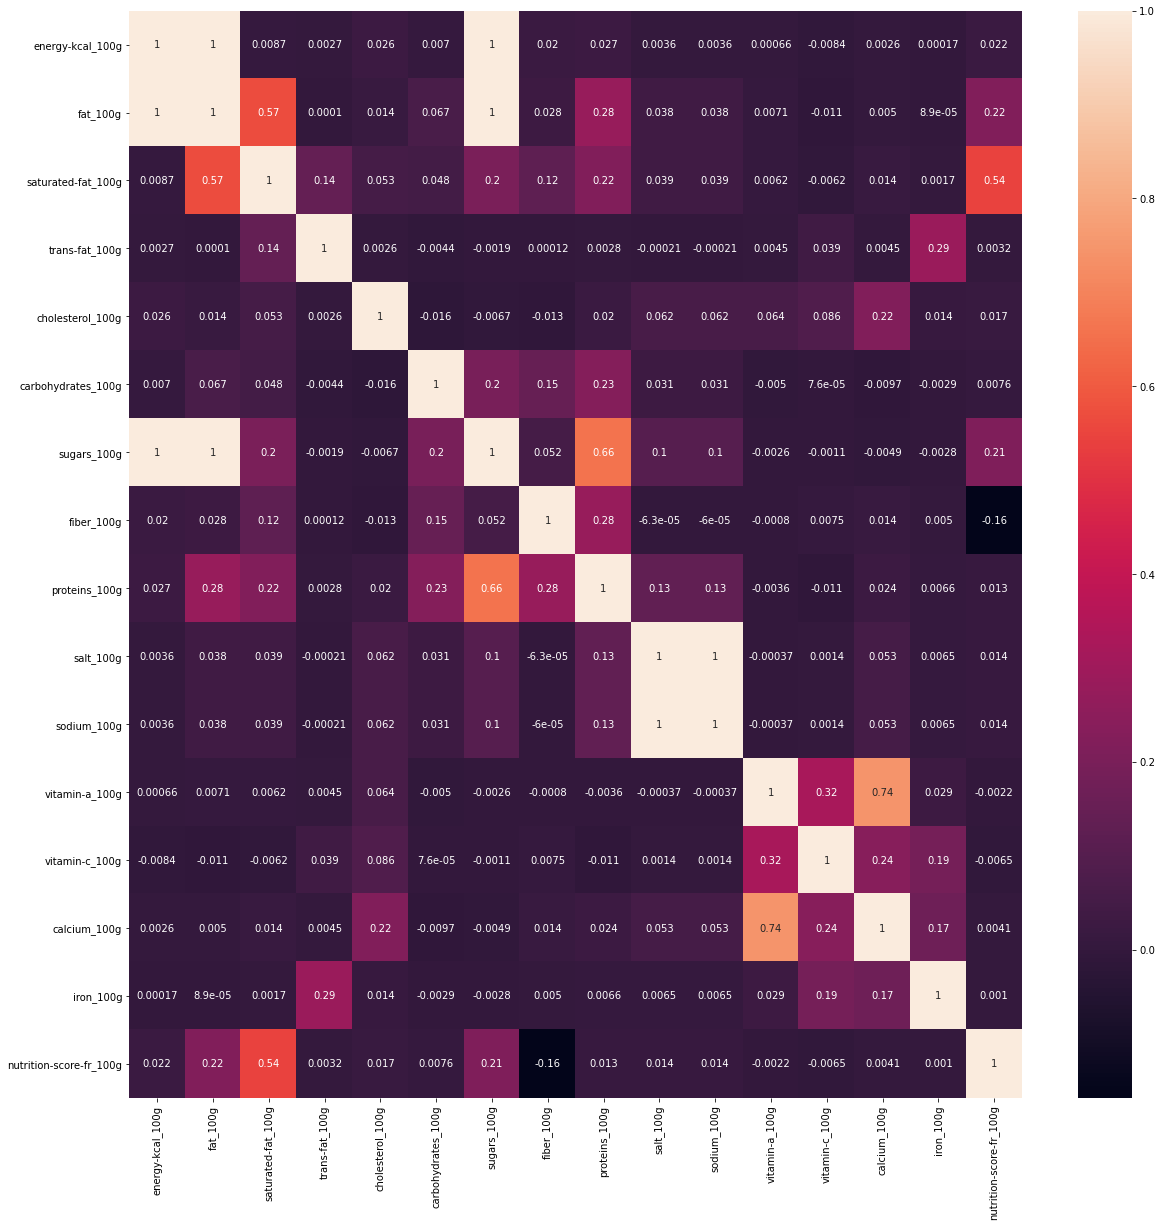

In [19]:
corr_df_100g = df_100g.corr(method='pearson')

plt.figure(figsize=(20, 20))
sns.heatmap(corr_df_100g, annot=True)
plt.show()

In [20]:
df_nan = pd.DataFrame({'Nan':df_100g.isna().sum()})
df_nan['%nan'] = df_nan['Nan']/df_100g.shape[0]*100
round(df_nan,2).sort_values(by='%nan' , ascending=False)

,Nan,%nan
vitamin-a_100g,1756680,89.20
vitamin-c_100g,1748922,88.81
trans-fat_100g,1704415,86.55
iron_100g,1704158,86.53
cholesterol_100g,1700395,86.34
calcium_100g,1698516,86.25
fiber_100g,1479434,75.12
nutrition-score-fr_100g,1253807,63.67
salt_100g,494465,25.11
sodium_100g,494468,25.11


energy-kcal_100g          AxesSubplot(0.125,0.71587;0.168478x0.16413)
fat_100g               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
saturated-fat_100g     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
carbohydrates_100g     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
sugars_100g              AxesSubplot(0.125,0.518913;0.168478x0.16413)
proteins_100g         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
salt_100g             AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

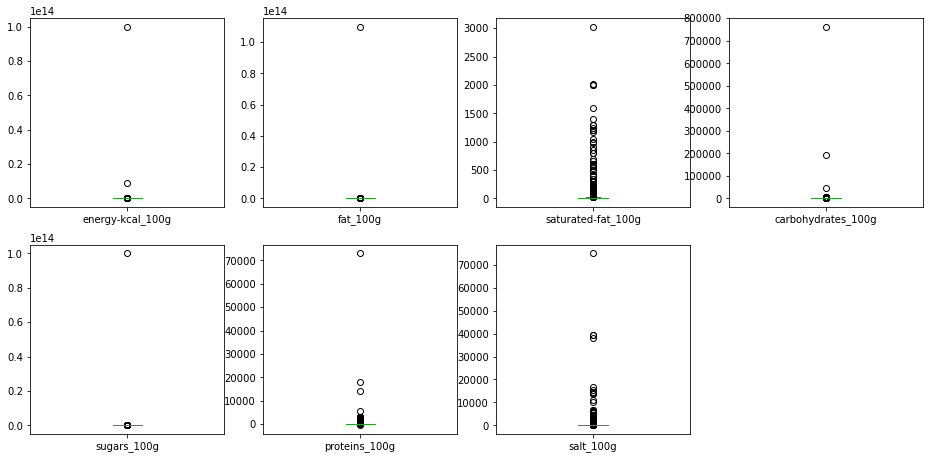

In [21]:
columns = ['sodium_100g','energy_100g','fiber_100g','nutrition-score-fr_100g','cholesterol_100g','vitamin-c_100g','vitamin-a_100g','trans-fat_100g','iron_100g','calcium_100g']
df_100g=df_100g.drop(columns, axis=1)
df_100g.plot(kind='box', subplots=True, layout=(4,4), figsize = (16, 16))

Visulation initiale - Elimination des colonnes inutiles

In [9]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]

In [10]:
df.shape

(1969352, 67)

Examen de la colonne target

In [11]:
df['nutriscore_grade'].value_counts(normalize=True)

d    0.311191
c    0.214936
e    0.183752
a    0.159794
b    0.130327
Name: nutriscore_grade, dtype: float64

In [12]:
df['nutriscore_grade'].value_counts().sum()

715539

# Datacleaning pour le model

In [14]:
df_test = df

In [15]:
df_nutriscore = df[['energy_100g','energy-kcal_100g','proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','saturated-fat_100g','salt_100g','sodium_100g','nutriscore_grade']]

In [16]:
df_nutriscore["energy_100g"] = df_nutriscore.energy_100g.astype(float)
df_nutriscore.dtypes.value_counts()

<ipython-input-16-df2442ac25eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutriscore["energy_100g"] = df_nutriscore.energy_100g.astype(float)


float64    9
object     1
dtype: int64

## Suppression des doublons

In [17]:
df_nutriscore.duplicated().sum()

794287

In [18]:
df= df_nutriscore.drop_duplicates(keep='first')

In [19]:
df_X = df.drop(['nutriscore_grade'], axis = 1)

In [20]:
df_X = df_X.dropna()
df_Y = df[['nutriscore_grade']]

## Remove Outliers

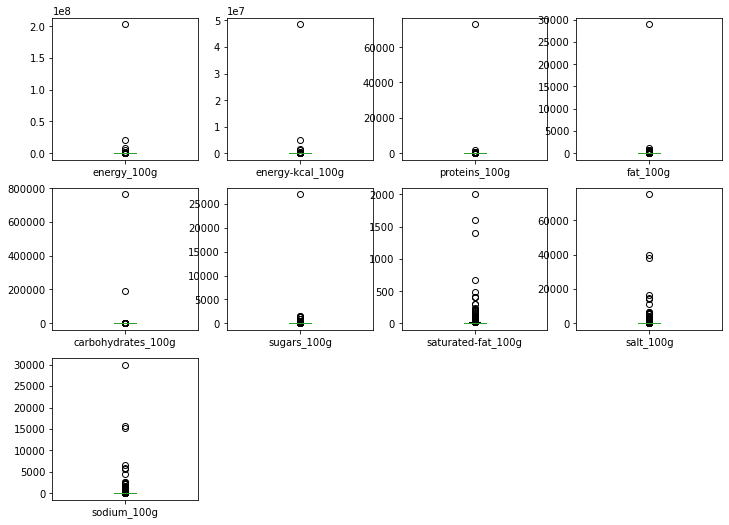

In [21]:
df_X.plot(kind='box', subplots=True, layout=(4, 4), figsize = (12, 12));

In [22]:
df_X.describe()

,energy_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,salt_100g,sodium_100g
count,1.009787e+06,1.009787e+06,1.009787e+06,1.009787e+06,1.009787e+06,1.009787e+06,1.009787e+06,1.009787e+06,1.009787e+06
mean,1.421680e+03,3.396407e+02,8.900930e+00,1.372128e+01,3.032298e+01,1.323650e+01,5.031817e+00,2.129194e+00,8.516485e-01
std,2.032347e+05,4.863673e+04,7.333886e+01,3.295988e+01,7.833520e+02,3.278773e+01,8.026765e+00,1.024419e+02,4.096237e+01
min,0.000000e+00,0.000000e+00,-8.330000e+00,0.000000e+00,-5.000000e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.980000e+02,1.190476e+02,2.250000e+00,1.500000e+00,4.940000e+00,9.000000e-01,2.000000e-01,1.000000e-01,4.000000e-02
50%,1.121000e+03,2.680000e+02,6.300000e+00,8.300000e+00,1.930000e+01,4.000000e+00,2.000000e+00,6.300000e-01,2.520000e-01
75%,1.707000e+03,4.080000e+02,1.200000e+01,2.142857e+01,5.333000e+01,1.980000e+01,7.000000e+00,1.400000e+00,5.600000e-01
max,2.030000e+08,4.860000e+07,7.300000e+04,2.900000e+04,7.629390e+05,2.700000e+04,2.000000e+03,7.500000e+04,3.000000e+04


In [23]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1

df_X = df_X[~((df_X < (Q1 - 1.5 * IQR)) |(df_X > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
df_X = df_X[(df_X['proteins_100g']>0) & (df_X['carbohydrates_100g']>0) & (df_X['sugars_100g']>0) & (df_X['carbohydrates_100g']<99)] 
df_X.describe()

,energy_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,salt_100g,sodium_100g
count,647654.000000,647654.000000,647654.000000,647654.000000,6.476540e+05,6.476540e+05,647654.000000,647654.000000,647654.000000
mean,1052.662799,251.716955,7.553805,11.024211,2.930567e+01,1.039487e+01,3.644050,0.801199,0.320480
std,677.386486,161.977436,5.937788,11.087621,2.486517e+01,1.219295e+01,4.270795,0.743383,0.297355
min,0.000000,0.000000,0.000001,0.000000,1.000000e-07,1.000000e-09,0.000000,0.000000,0.000000
25%,448.000000,107.000000,3.000000,1.900000,7.000000e+00,1.520000e+00,0.400000,0.130000,0.052000
50%,983.000000,235.000000,6.300000,7.500000,2.100000e+01,4.400000e+00,1.900000,0.667500,0.267000
75%,1594.000000,381.000000,10.900000,17.780000,5.135000e+01,1.600000e+01,5.500000,1.203960,0.481584
max,3519.000000,841.000000,26.610000,51.300000,9.877000e+01,4.815000e+01,17.200000,3.350000,1.340000


In [25]:
df_X['nutriscore_grade'] = df_Y['nutriscore_grade']

In [26]:
df_model = df_X.dropna(axis = 0, how = 'all')

In [27]:
df_model.isnull().sum()

energy_100g                0
energy-kcal_100g           0
proteins_100g              0
fat_100g                   0
carbohydrates_100g         0
sugars_100g                0
saturated-fat_100g         0
salt_100g                  0
sodium_100g                0
nutriscore_grade      328718
dtype: int64

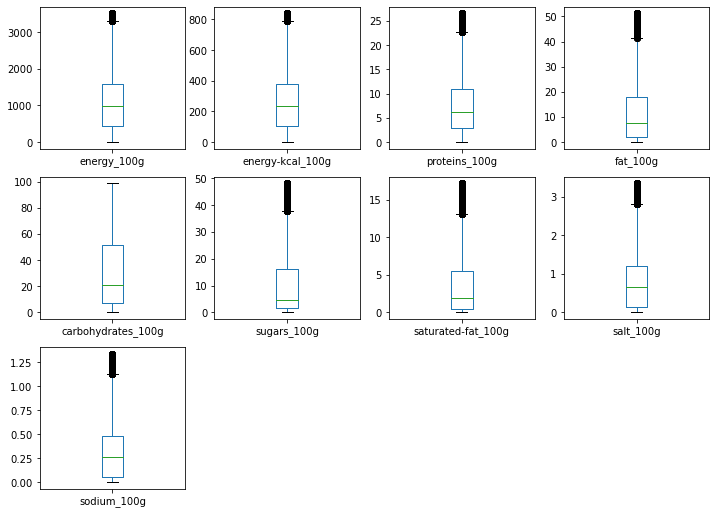

In [28]:
df_model.plot(kind='box', subplots=True, layout=(4, 4), figsize = (12, 12));

# Visualisation de la target et des features

In [29]:
df_visu = df_model.dropna()

In [ ]:
df_visu.shape

<AxesSubplot:xlabel='nutriscore_grade', ylabel='energy_100g'>

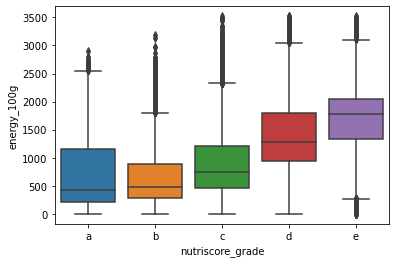

In [31]:
sns.boxplot(x='nutriscore_grade',y='energy_100g', data=df_visu,order=["a", "b","c","d","e"])

<AxesSubplot:xlabel='nutriscore_grade', ylabel='energy-kcal_100g'>

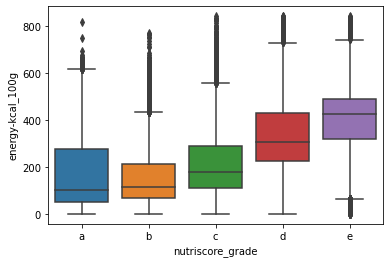

In [32]:
sns.boxplot(x='nutriscore_grade',y='energy-kcal_100g', data=df_visu,order=["a", "b","c","d","e"])

<AxesSubplot:xlabel='nutriscore_grade', ylabel='proteins_100g'>

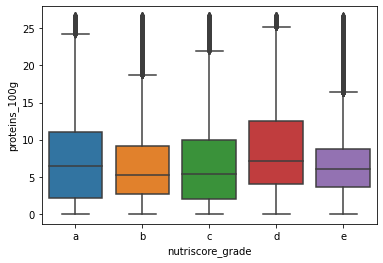

In [33]:
sns.boxplot(x='nutriscore_grade',y='proteins_100g', data=df_visu,order=["a", "b","c","d","e"])

<AxesSubplot:xlabel='nutriscore_grade', ylabel='fat_100g'>

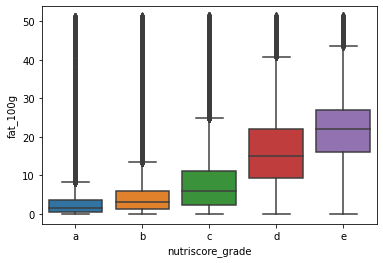

In [34]:
sns.boxplot(x='nutriscore_grade',y='fat_100g', data=df_visu,order=["a", "b","c","d","e"])

<AxesSubplot:xlabel='nutriscore_grade', ylabel='carbohydrates_100g'>

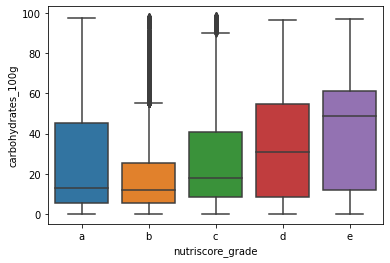

In [35]:
sns.boxplot(x='nutriscore_grade',y='carbohydrates_100g', data=df_visu,order=["a", "b","c","d","e"])

<AxesSubplot:xlabel='nutriscore_grade', ylabel='saturated-fat_100g'>

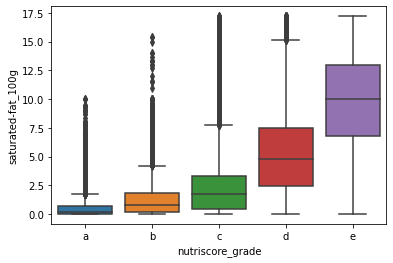

In [36]:
sns.boxplot(x='nutriscore_grade',y='saturated-fat_100g', data=df_visu,order=["a", "b","c","d","e"])

<AxesSubplot:xlabel='nutriscore_grade', ylabel='sugars_100g'>

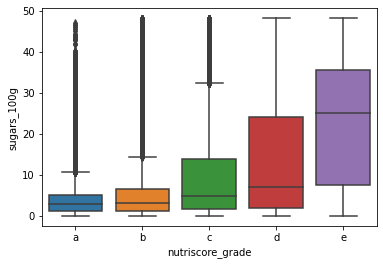

In [37]:
sns.boxplot(x='nutriscore_grade',y='sugars_100g', data=df_visu,order=["a", "b","c","d","e"])

<AxesSubplot:xlabel='nutriscore_grade', ylabel='salt_100g'>

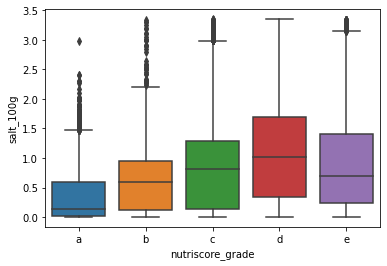

In [38]:
sns.boxplot(x='nutriscore_grade',y='salt_100g', data=df_visu,order=["a", "b","c","d","e"])

<AxesSubplot:xlabel='nutriscore_grade', ylabel='sodium_100g'>

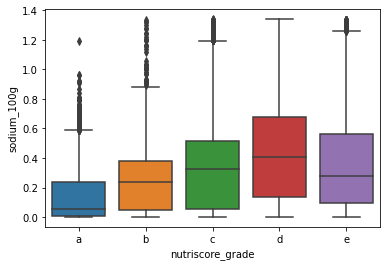

In [39]:
sns.boxplot(x='nutriscore_grade',y='sodium_100g', data=df_visu,order=["a", "b","c","d","e"])

In [40]:
df_test.head()

,energy_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,salt_100g,sodium_100g,nutriscore_grade
2,1569.0,375.0,7.8,7.0,70.1,15.0,3.08,1.40,0.560,NaN
8,88.0,21.0,0.2,0.0,4.8,0.4,0.00,2.04,0.816,NaN
9,251.0,60.0,2.0,3.0,10.0,3.0,1.00,1.15,0.460,NaN
15,264.0,63.0,0.2,0.0,15.5,15.5,0.00,0.00,0.000,NaN
17,134.0,32.0,0.9,0.3,5.3,3.9,0.10,0.42,0.168,b
